<html>

<h1><strong> Imports </strong></h1>

</html>

In [91]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns
import seaborn.objects as so

import sklearn as skl
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_distances_argmin_min

from collections import Counter

import math
import random
import sys

# show files in current directory
import os
os.listdir()

['attempt_1.ipynb',
 'endeavour.npz',
 'endeavour_csv',
 'output.png',
 'output0.png',
 'output1.png',
 'output2.png',
 'output3.png',
 'output4.png',
 'output5.png',
 'SIMC_2024_Endeavour_Challenge.pdf']

<html>

<h1><strong> Datasets </strong></h1>
<hr class="dashed">
<a href="https://numpy.org/doc/stable/user/quickstart.html">NumPy Quickstart<a>

</html>

In [2]:
loaded = np.load("endeavour.npz")
task1 = loaded["task1"]
task2 = loaded["task2"]
task3 = loaded["task3"]
task4 = loaded["task4"]
task6a = loaded["task6a"]
task6b = loaded["task6b"]
task7a = loaded["task7a"]
task7b = loaded["task7b"]
for k in loaded.keys():
    print(f"key {k} has shape: {loaded[k].shape}")

key task1 has shape: (25, 18, 18)
key task2 has shape: (100, 1296)
key task3 has shape: (1000, 1089)
key task4 has shape: (1000, 2500)
key task6a has shape: (1556153,)
key task6b has shape: (1556153,)
key task7a has shape: (2737941,)
key task7b has shape: (2737941,)


<html>
<h1><strong>Task 1</h1></strong>
</html>

## Reference Matrix

<Axes: title={'center': 'Reference'}>

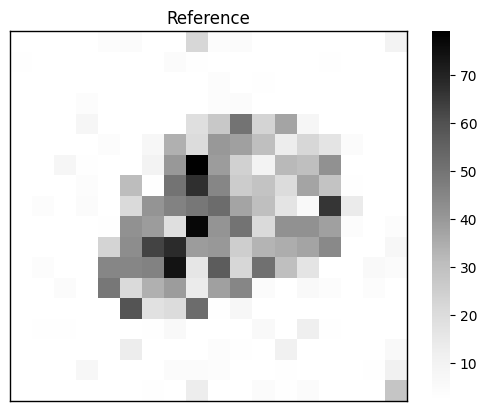

In [3]:

reference = task1[0]
ax = sns.heatmap(reference, cmap="Greys")
#ax.set_axis_off()
ax.set(title="Reference")
for _, spine in ax.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")
ax.tick_params(left=False, bottom=False)
ax.set(xticklabels=[], yticklabels=[])
ax

## Rotated Forms and their Unique Keys

In [4]:
def rotations(matrix):
    z = np.rot90(matrix)
    y = np.rot90(z)
    x = np.rot90(y)
    return matrix, x, y, z

rotated_forms = rotations(reference)

rot_forms_hashed = []
for x in rotated_forms:
    rot_forms_hashed.append(hash(x.data.tobytes()))

rotated_counts = [0, 0, 0, 0]
rot_forms_hashed

[5861927434409464671,
 1674185104609244730,
 3677274341250349203,
 -3904019553655426317]

## Plot of Rotated Figures

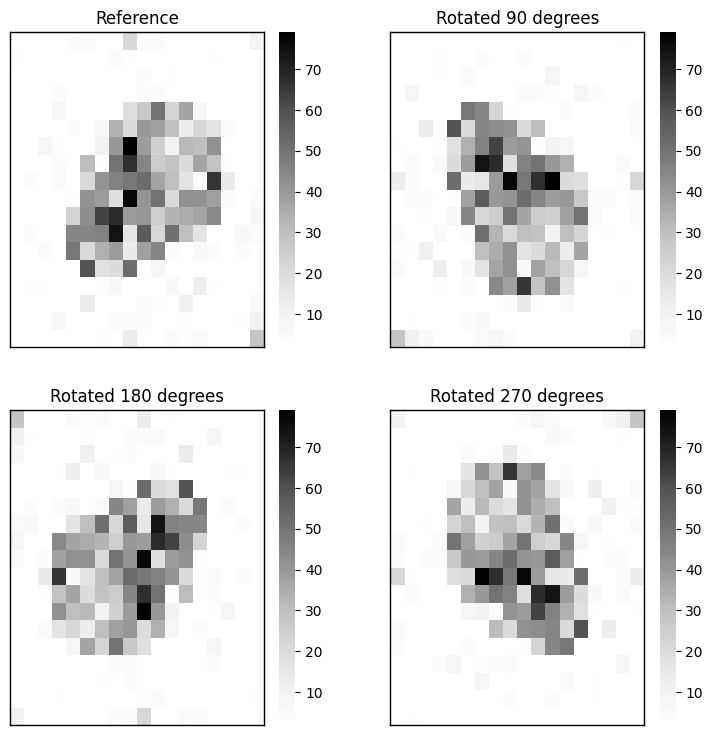

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
        nrows=2, ncols=2,
        figsize=(9, 9)
    )

sns.heatmap(reference, cmap="Greys", ax=ax1)
sns.heatmap(rotated_forms[1], cmap="Greys", ax=ax2)
sns.heatmap(rotated_forms[2], cmap="Greys", ax=ax3)
sns.heatmap(rotated_forms[3], cmap="Greys", ax=ax4)

ax1.set(title="Reference")
for _, spine in ax1.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")
ax1.tick_params(left=False, bottom=False)
ax1.set(xticklabels=[], yticklabels=[])

ax2.set(title="Rotated 90 degrees")
for _, spine in ax2.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")
ax2.tick_params(left=False, bottom=False)
ax2.set(xticklabels=[], yticklabels=[])

ax3.set(title="Rotated 180 degrees")
for _, spine in ax3.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")
ax3.tick_params(left=False, bottom=False)
ax3.set(xticklabels=[], yticklabels=[])

ax4.set(title="Rotated 270 degrees")
for _, spine in ax4.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")
ax4.tick_params(left=False, bottom=False)
ax4.set(xticklabels=[], yticklabels=[])
None

## Number of Patterns Rotated in Task1 Dataset

In [6]:
for i in range(task1.shape[0]):
    x = task1[i]
    rotated_counts[rot_forms_hashed.index(hash(x.data.tobytes()))] += 1

print("Number of patterns rotated 0, 90, 180, and 270 degrees with respect to the first pattern:", rotated_counts)

Number of patterns rotated 0, 90, 180, and 270 degrees with respect to the first pattern: [6, 10, 6, 3]


# **Task 2**

## Task 2's Plot

In [7]:
ylen, xlen = task2.shape

<Axes: title={'center': 'Unsorted Patterns'}>

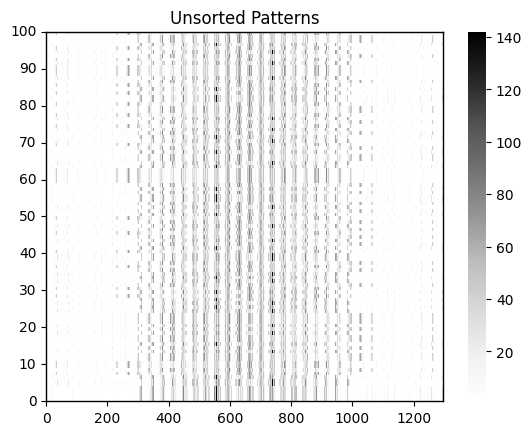

In [8]:
ax = sns.heatmap(task2, cmap="Greys")
ax.invert_yaxis()
ax.set(title="Unsorted Patterns")

ax.set_xticks([x for x in range(0, xlen+1, 200)])
ax.set_xticklabels(range(0, xlen+1, 200))
ax.tick_params(axis='x', rotation=0, labelsize=10)
ax.set_yticks([y for y in range(0, ylen+1, 10)])
ax.set_yticklabels(range(0, ylen+1, 10))
ax.tick_params(axis='y', rotation=0, labelsize=10)

for _, spine in ax.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")
ax

## Reference Matrix

<Axes: title={'center': 'Reference'}>

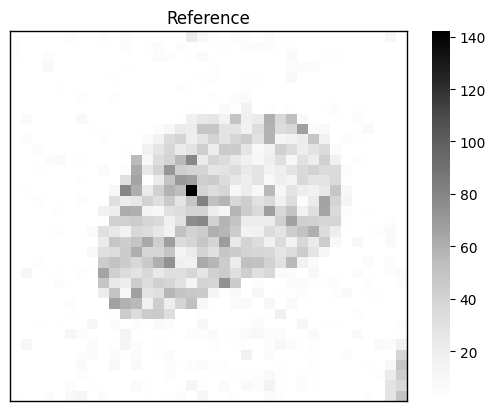

In [9]:
reference2 = task2[0].reshape(36, 36)
ax = sns.heatmap(reference2, cmap="Greys")
ax.set(title="Reference")

for _, spine in ax.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")
ax.tick_params(left=False, bottom=False)
ax.set(xticklabels=[], yticklabels=[])
ax

## Rotated Forms and their Unique Keys

In [10]:
rotated_forms2 = rotations(reference2)

rot_forms_hashed2 = []
for x in rotated_forms2:
    rot_forms_hashed2.append(hash(x.data.tobytes()))

rotated_counts2 = [0, 0, 0, 0]
rot_forms_hashed2

[-8759336160363428840,
 8694576909204860285,
 5596854957691035864,
 4725619271455553191]

## Number of Patterns Rotated in Task2 Dataset

In [11]:
orientations = []
for i in range(task2.shape[0]):
    x = task2[i].reshape(36, 36)
    orientation = rot_forms_hashed2.index(hash(x.data.tobytes()))
    orientations.append([orientation])
    rotated_counts2[orientation] += 1

print("Number of patterns rotated 0, 90, 180, and 270 degrees with respect to the first pattern:", rotated_counts2)

Number of patterns rotated 0, 90, 180, and 270 degrees with respect to the first pattern: [22, 32, 21, 25]


## Sorting the Matrix by Each Row's Orientation

In [12]:
task2_sorted = np.append(task2, orientations, axis=1)

task2_sorted = task2_sorted[task2_sorted[:,-1].argsort()]

divisions = []
count = 0
for i, v in enumerate(sorted(orientations)):
    if v[0] > count:
        divisions.append(i)
        count += 1

task2_sorted = task2_sorted[:,:-1]
divisions

[22, 54, 75]

## Plotting Unsorted and Sorted Design Matrices

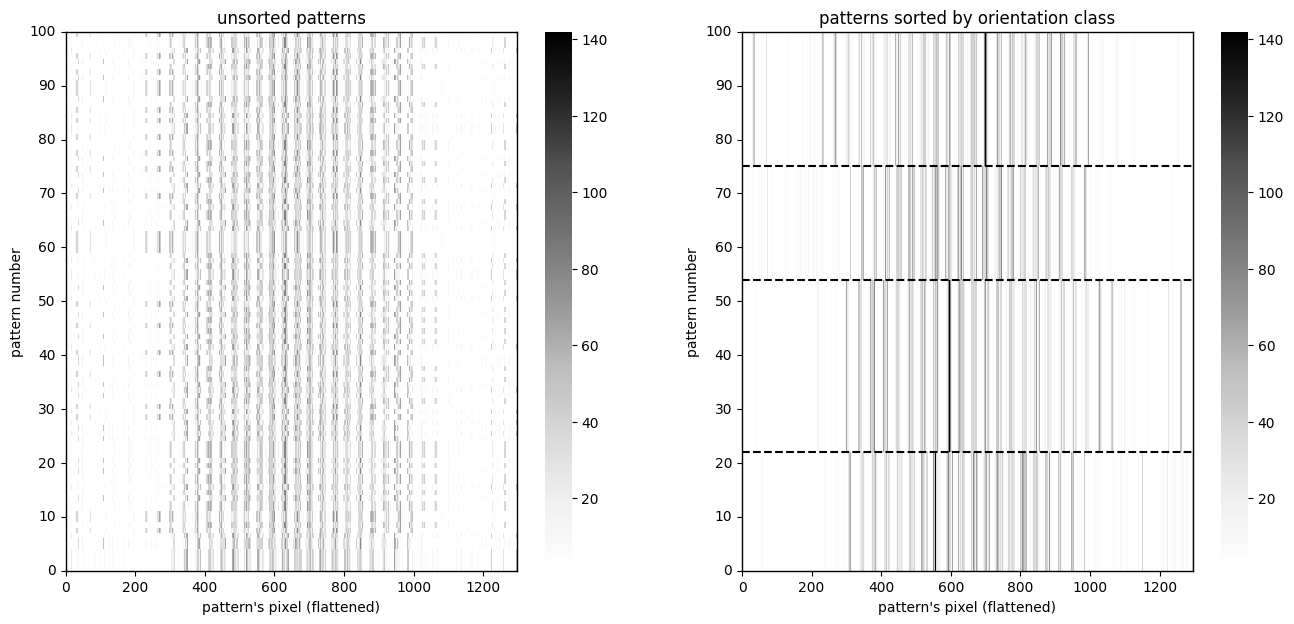

In [13]:
fig, (ax1, ax2) = plt.subplots(
        nrows=1, ncols=2,
        figsize=(16, 7)
    )

sns.heatmap(task2, cmap="Greys", ax=ax1)
ax1.invert_yaxis()
ax1.set(title="unsorted patterns", xlabel="pattern's pixel (flattened)", ylabel="pattern number")

ax1.set_xticks([x for x in range(0, xlen+1, 200)])
ax1.set_xticklabels(range(0, xlen+1, 200))
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.set_yticks([y for y in range(0, ylen+1, 10)])
ax1.set_yticklabels(range(0, ylen+1, 10))
ax1.tick_params(axis='y', rotation=0, labelsize=10)

for _, spine in ax1.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")


sns.heatmap(task2_sorted, cmap="Greys", ax=ax2)
ax2.invert_yaxis()
ax2.hlines(divisions, *ax2.get_xlim(), linestyles="dashed", colors="Black")
ax2.set(title="patterns sorted by orientation class", xlabel="pattern's pixel (flattened)", ylabel="pattern number")

ax2.set_xticks([x for x in range(0, xlen+1, 200)])
ax2.set_xticklabels(range(0, xlen+1, 200))
ax2.tick_params(axis='x', rotation=0, labelsize=10)
ax2.set_yticks([y for y in range(0, ylen+1, 10)])
ax2.set_yticklabels(range(0, ylen+1, 10))
ax2.tick_params(axis='y', rotation=0, labelsize=10)

for _, spine in ax2.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")

# **Task 3**

In [14]:
task3.shape

(1000, 1089)

## Reference Matrix

[Text(0.5, 1.0, 'Reference')]

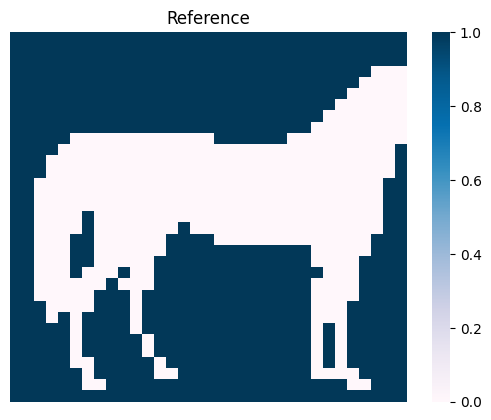

In [15]:
ax = sns.heatmap(task3[0].reshape(33, 33), cmap="PuBu")
ax.set_axis_off()
ax.set(title="Reference")

In [16]:
ylen, xlen = task3.shape

## Task 3's Plot

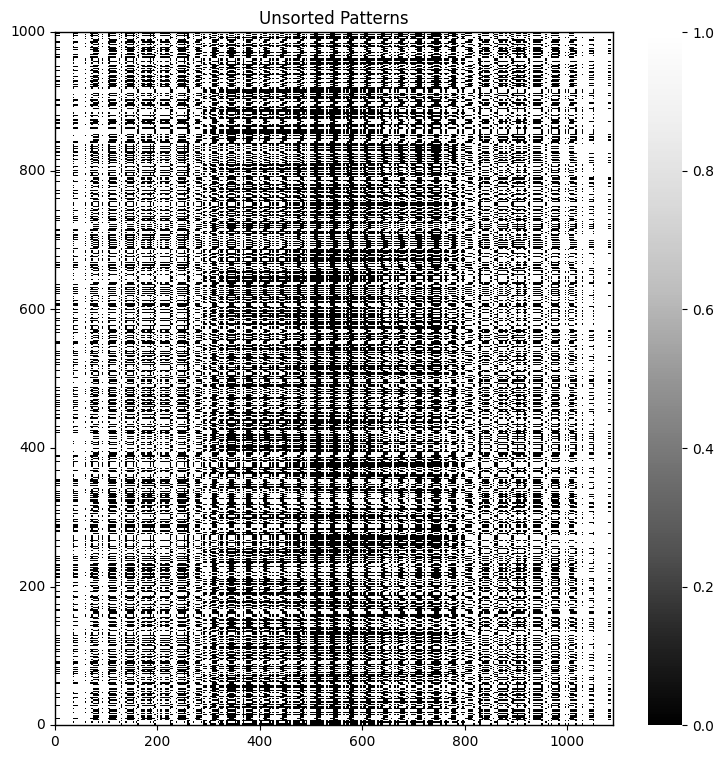

In [17]:
fig, ax = plt.subplots(
        nrows=1, ncols=1,
        figsize=(9, 9)
)

ax = sns.heatmap(task3, cmap="Greys_r")
ax.invert_yaxis()
ax.set(title="Unsorted Patterns")

ax.set_xticks([x for x in range(0, xlen+1, 200)])
ax.set_xticklabels(range(0, xlen+1, 200))
ax.tick_params(axis='x', rotation=0, labelsize=10)
ax.set_yticks([y for y in range(0, ylen+1, 200)])
ax.set_yticklabels(range(0, ylen+1, 200))
ax.tick_params(axis='y', rotation=0, labelsize=10)

for _, spine in ax.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")

## Rotated Forms and their Unique Keys

In [18]:
reference3 = task3[0].reshape(33, 33)
rotated_forms3 = rotations(reference3)

rot_forms_hashed3 = []
for x in rotated_forms3:
    rot_forms_hashed3.append(hash(x.data.tobytes()))

rotated_counts3 = [0, 0, 0, 0]
rot_forms_hashed3

[-3035441162303874008,
 6074944304343194686,
 1812789292110216118,
 -8213637773971833465]

## Number of Patterns Rotated in Task3 Dataset

In [19]:
orientations = []
for i in range(task3.shape[0]):
    x = task3[i].reshape(33, 33)
    orientation = rot_forms_hashed3.index(hash(x.data.tobytes()))
    orientations.append([orientation])
    rotated_counts3[orientation] += 1

print("Number of patterns rotated 0, 90, 180, and 270 degrees with respect to the first pattern:", rotated_counts3)

Number of patterns rotated 0, 90, 180, and 270 degrees with respect to the first pattern: [254, 236, 250, 260]


## Sorting the Matrix by Each Row's Orientation

In [20]:
task3_sorted = np.append(task3, orientations, axis=1)

task3_sorted = task3_sorted[task3_sorted[:,-1].argsort()]

divisions = []
count = 0
for i, v in enumerate(sorted(orientations)):
    if v[0] > count:
        divisions.append(i)
        count += 1

task3_sorted = task3_sorted[:,:-1]
divisions

[254, 490, 740]

## Plotting Unsorted and Sorted Design Matrices

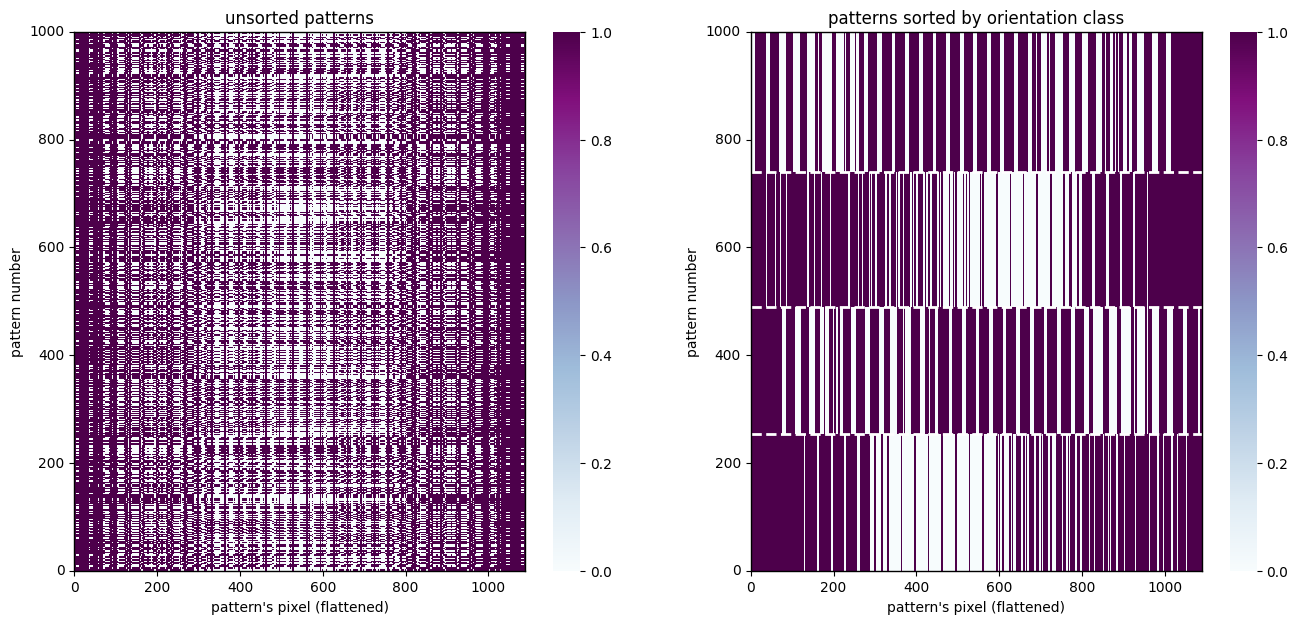

In [21]:
fig, (ax1, ax2) = plt.subplots(
        nrows=1, ncols=2,
        figsize=(16, 7)
    )


sns.heatmap(task3, cmap="BuPu", ax=ax1)
ax1.invert_yaxis()
ax1.set(title="unsorted patterns", xlabel="pattern's pixel (flattened)", ylabel="pattern number")

ax1.set_xticks([x for x in range(0, xlen+1, 200)])
ax1.set_xticklabels(range(0, xlen+1, 200))
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.set_yticks([y for y in range(0, ylen+1, 200)])
ax1.set_yticklabels(range(0, ylen+1, 200))
ax1.tick_params(axis='y', rotation=0, labelsize=10)

for _, spine in ax1.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")


sns.heatmap(task3_sorted, cmap="BuPu", ax=ax2)
ax2.invert_yaxis()
ax2.hlines(divisions, *ax.get_xlim(), linestyles="dashed", colors="White", linewidth = 2)
ax2.set(title="patterns sorted by orientation class", xlabel="pattern's pixel (flattened)", ylabel="pattern number")

ax2.set_xticks([x for x in range(0, xlen+1, 200)])
ax2.set_xticklabels(range(0, xlen+1, 200))
ax2.tick_params(axis='x', rotation=0, labelsize=10)
ax2.set_yticks([y for y in range(0, ylen+1, 200)])
ax2.set_yticklabels(range(0, ylen+1, 200))
ax2.tick_params(axis='y', rotation=0, labelsize=10)

for _, spine in ax2.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")

# **Task 4**

In [22]:
ylen, xlen = task4.shape
task4.shape

(1000, 2500)

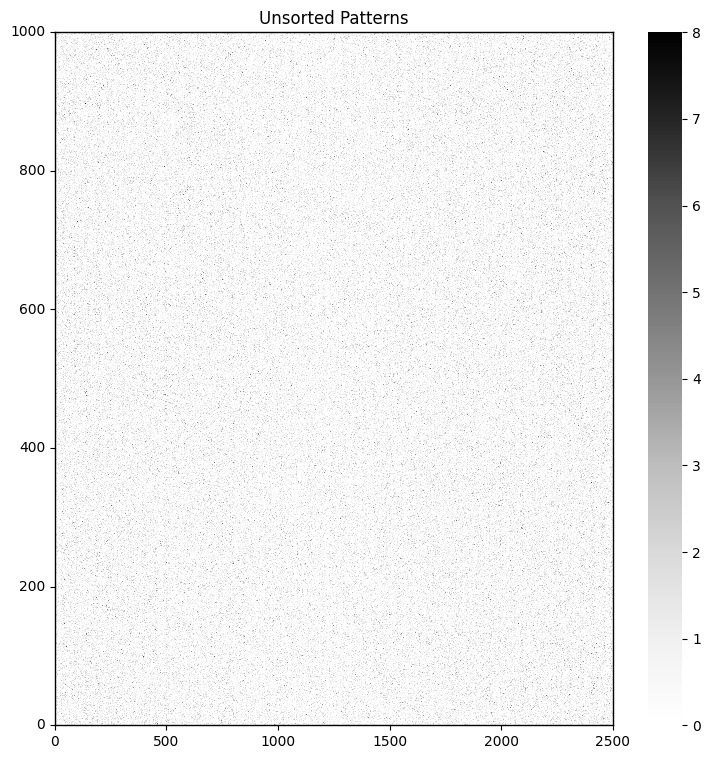

In [23]:
fig, ax = plt.subplots(
        nrows=1, ncols=1,
        figsize=(9, 9)
)

ax = sns.heatmap(task4, cmap="Greys")
ax.invert_yaxis()
ax.set(title="Unsorted Patterns")

ax.set_xticks([x for x in range(0, xlen+1, 500)])
ax.set_xticklabels(range(0, xlen+1, 500))
ax.tick_params(axis='x', rotation=0, labelsize=10)
ax.set_yticks([y for y in range(0, ylen+1, 200)])
ax.set_yticklabels(range(0, ylen+1, 200))
ax.tick_params(axis='y', rotation=0, labelsize=10)

for _, spine in ax.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")

In [24]:
# Task 4(a)

# Compute the sum of each row
row_sums = np.sum(task4, axis=1)

# Calculate the average sum
average_sum = np.mean(row_sums)

# Print the average sum
print("Average sum of all rows in task4:", average_sum)

Average sum of all rows in task4: 1251.047


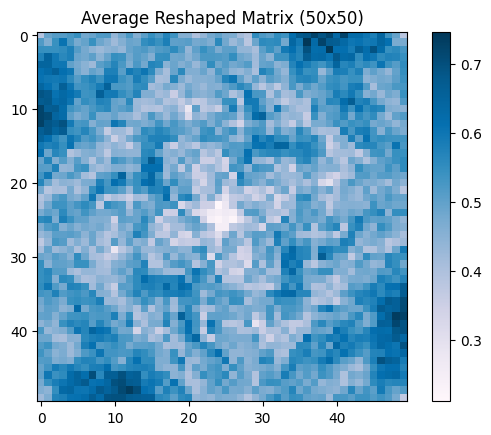

In [25]:
# Task 4(b)

# Compute the average of each column
column_averages = np.mean(task4, axis=0)

# Reshape each row into a 50x50 matrix
reshaped_matrices = column_averages.reshape(1, 50, 50)

plt.imshow(reshaped_matrices[0], cmap='PuBu')
plt.title('Average Reshaped Matrix (50x50)')
plt.colorbar()
plt.show()

In [26]:
# Task 4(c)

#Apply K-means clustering to group rows into four clusters (orientations)
kmeans = KMeans(n_clusters=4, n_init=200, init="k-means++",)
kmeans.fit(task4)

# Get the cluster labels for each row
labels = kmeans.labels_

# Access each cluster separately
clusters = []
for i in range(4):
    cluster_indices = np.where(labels == i)[0]
    cluster_matrix = task4[cluster_indices]
    clusters.append(cluster_matrix)

# Compute the column averages for each cluster
reshaped_clusters = []
for cluster_matrix in clusters:
    column_averages = np.mean(cluster_matrix, axis=0)
    reshaped_cluster = column_averages.reshape(50, 50)
    reshaped_clusters.append(reshaped_cluster)



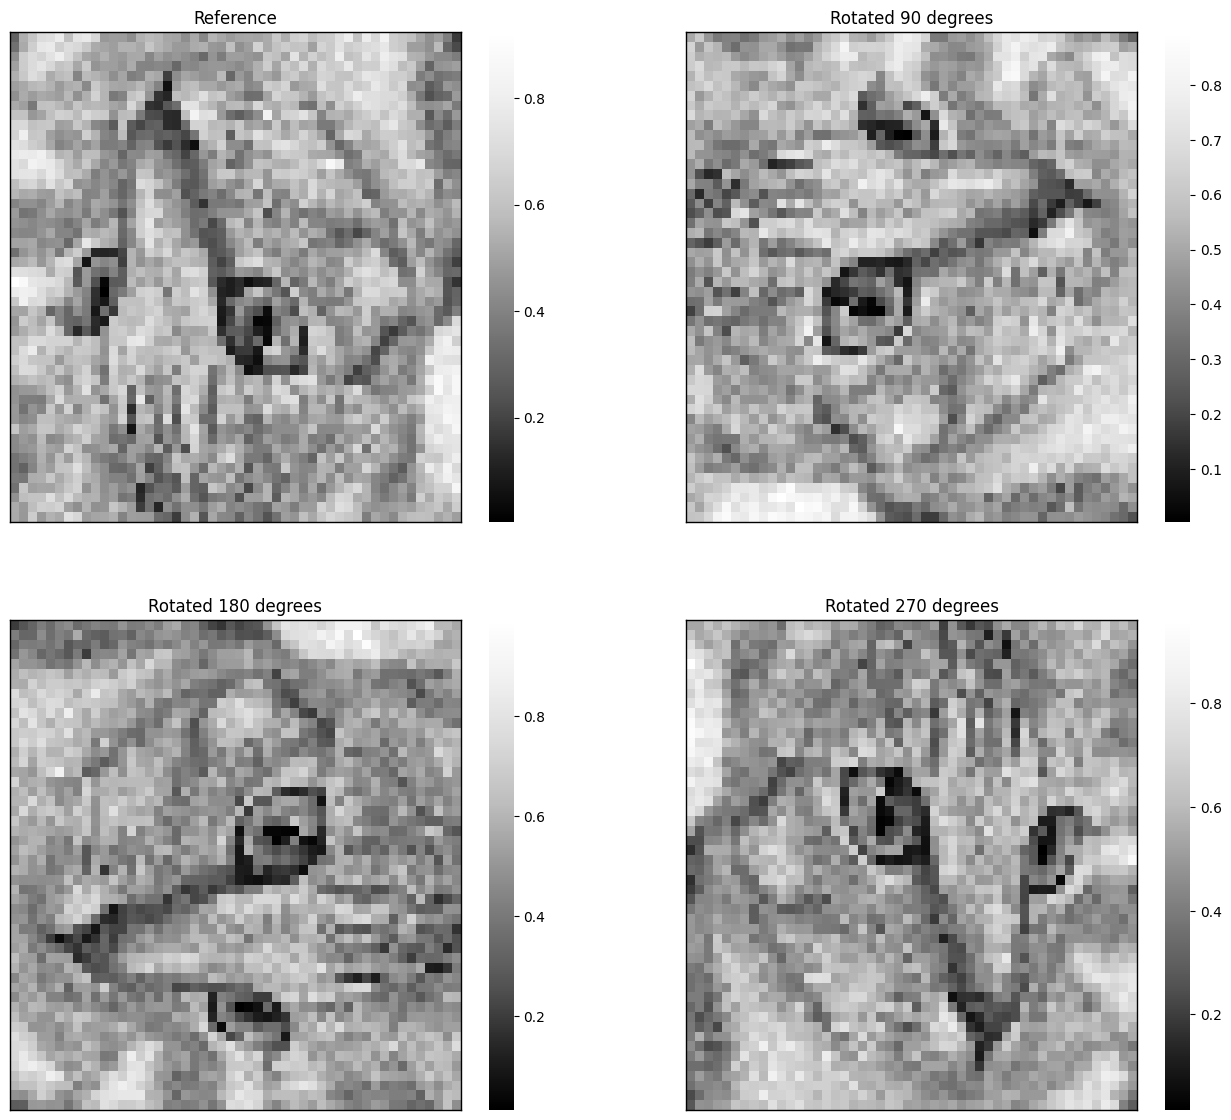

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
        nrows=2, ncols=2,
        figsize=(16, 14)
    )


sns.heatmap(reshaped_clusters[2], cmap="Greys_r", ax=ax1)
sns.heatmap(reshaped_clusters[3], cmap="Greys_r", ax=ax2)
sns.heatmap(reshaped_clusters[0], cmap="Greys_r", ax=ax3)
sns.heatmap(reshaped_clusters[1], cmap="Greys_r", ax=ax4)

ax1.set(title="Reference")
for _, spine in ax1.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")
ax1.tick_params(left=False, bottom=False)
ax1.set(xticklabels=[], yticklabels=[])

ax2.set(title="Rotated 90 degrees")
for _, spine in ax2.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")
ax2.tick_params(left=False, bottom=False)
ax2.set(xticklabels=[], yticklabels=[])

ax3.set(title="Rotated 180 degrees")
for _, spine in ax3.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")
ax3.tick_params(left=False, bottom=False)
ax3.set(xticklabels=[], yticklabels=[])

ax4.set(title="Rotated 270 degrees")
for _, spine in ax4.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")
ax4.tick_params(left=False, bottom=False)
ax4.set(xticklabels=[], yticklabels=[])
None

# **Task 6**

In [28]:
task6a.shape

(1556153,)

In [29]:
task6b.shape

(1556153,)

In [30]:
xlen = 625
ylen = 65535

In [31]:
# Task 6(a)

print("The average sum of all rows in task6:", len(task6a)/65535)

The average sum of all rows in task6: 23.745372701609828


## Generating the Matrix

In [32]:
task6_matrix = np.zeros((ylen, xlen))
task6_matrix[task6a, task6b] = 1
task6_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<Axes: title={'center': 'Task 6 design matrix'}>

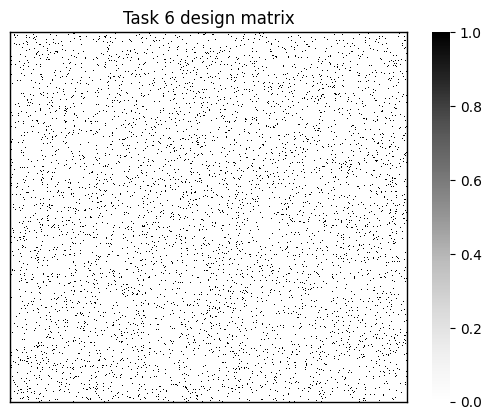

In [33]:
ax = sns.heatmap(task6_matrix, cmap="Greys")
#ax.set_axis_off()
ax.set(title="Task 6 design matrix")
for _, spine in ax.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")
ax.tick_params(left=False, bottom=False)
ax.set(xticklabels=[], yticklabels=[])
ax

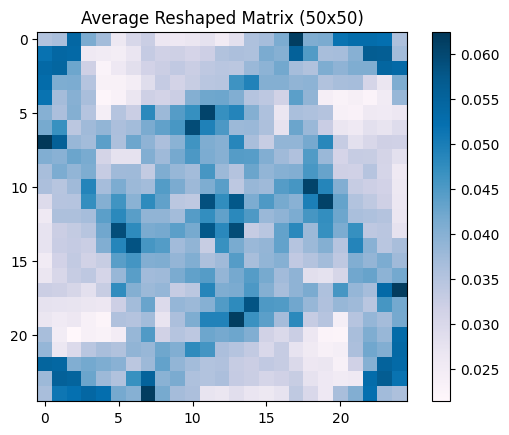

In [34]:
# Task 6(b)

# Compute the average of each column
column_averages = np.mean(task6_matrix, axis=0)

# Reshape each row into a 50x50 matrix
reshaped_matrices = column_averages.reshape(1, 25, 25)

plt.imshow(reshaped_matrices[0], cmap='PuBu')
plt.title('Average Reshaped Matrix (50x50)')
plt.colorbar()
plt.show()

In [35]:
# Task 6(c)

#Apply K-means clustering to group rows into four clusters (orientations)
kmeans = KMeans(n_clusters=4, n_init=50, init="k-means++", random_state=6)
kmeans.fit(task6_matrix)

# Get the cluster labels for each row
labels = kmeans.labels_

# Access each cluster separately
clusters = []
for i in range(4):
    cluster_indices = np.where(labels == i)[0]
    cluster_matrix = task6_matrix[cluster_indices]
    clusters.append(cluster_matrix)

# Compute the column averages for each cluster
reshaped_clusters = []
for cluster_matrix in clusters:
    column_averages = np.mean(cluster_matrix, axis=0)
    reshaped_cluster = column_averages.reshape(25, 25)
    reshaped_clusters.append(reshaped_cluster)


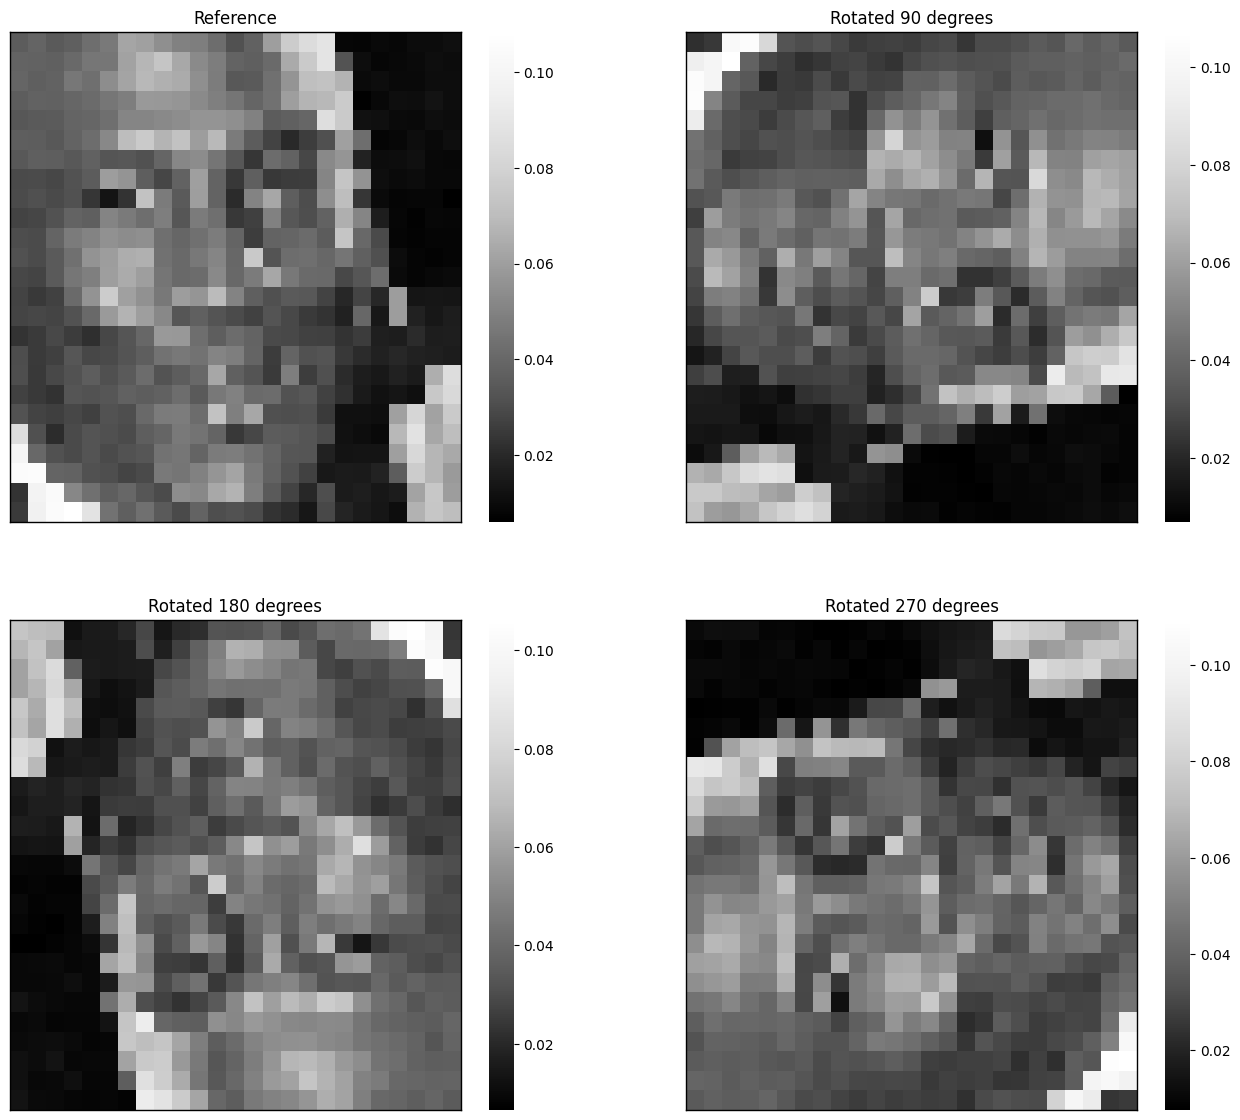

In [36]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
        nrows=2, ncols=2,
        figsize=(16, 14)
    )


sns.heatmap(reshaped_clusters[0], cmap="Greys_r", ax=ax1)
sns.heatmap(reshaped_clusters[1], cmap="Greys_r", ax=ax2)
sns.heatmap(reshaped_clusters[2], cmap="Greys_r", ax=ax3)
sns.heatmap(reshaped_clusters[3], cmap="Greys_r", ax=ax4)

ax1.set(title="Reference")
for _, spine in ax1.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")
ax1.tick_params(left=False, bottom=False)
ax1.set(xticklabels=[], yticklabels=[])

ax2.set(title="Rotated 90 degrees")
for _, spine in ax2.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")
ax2.tick_params(left=False, bottom=False)
ax2.set(xticklabels=[], yticklabels=[])

ax3.set(title="Rotated 180 degrees")
for _, spine in ax3.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")
ax3.tick_params(left=False, bottom=False)
ax3.set(xticklabels=[], yticklabels=[])

ax4.set(title="Rotated 270 degrees")
for _, spine in ax4.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")
ax4.tick_params(left=False, bottom=False)
ax4.set(xticklabels=[], yticklabels=[])
None

# **Task 7**

In [37]:
task7a.shape

(2737941,)

In [38]:
task7b.shape

(2737941,)

In [39]:
xlen = 625
ylen = 100000

In [40]:
print("The average sum of all rows in task6:", len(task7a)/100000)

The average sum of all rows in task6: 27.37941


In [41]:
task7_matrix = np.zeros((ylen, xlen))
task7_matrix[task7a, task7b] = 1
task7_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

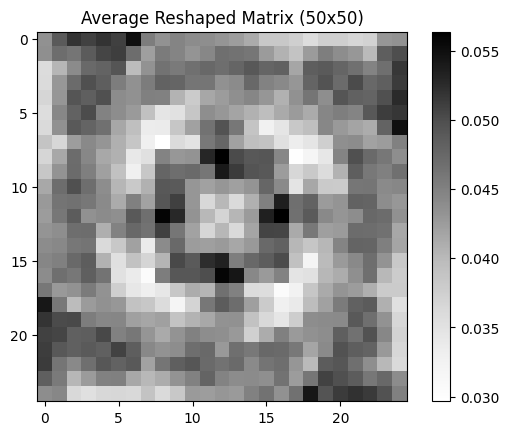

In [42]:

# Compute the average of each column
column_averages = np.mean(task7_matrix, axis=0)

# Reshape each row into a 50x50 matrix
reshaped_matrices = column_averages.reshape(1, 25, 25)

plt.imshow(reshaped_matrices[0], cmap='Greys')
plt.title('Average Reshaped Matrix (50x50)')
plt.colorbar()
plt.show()

<Axes: >

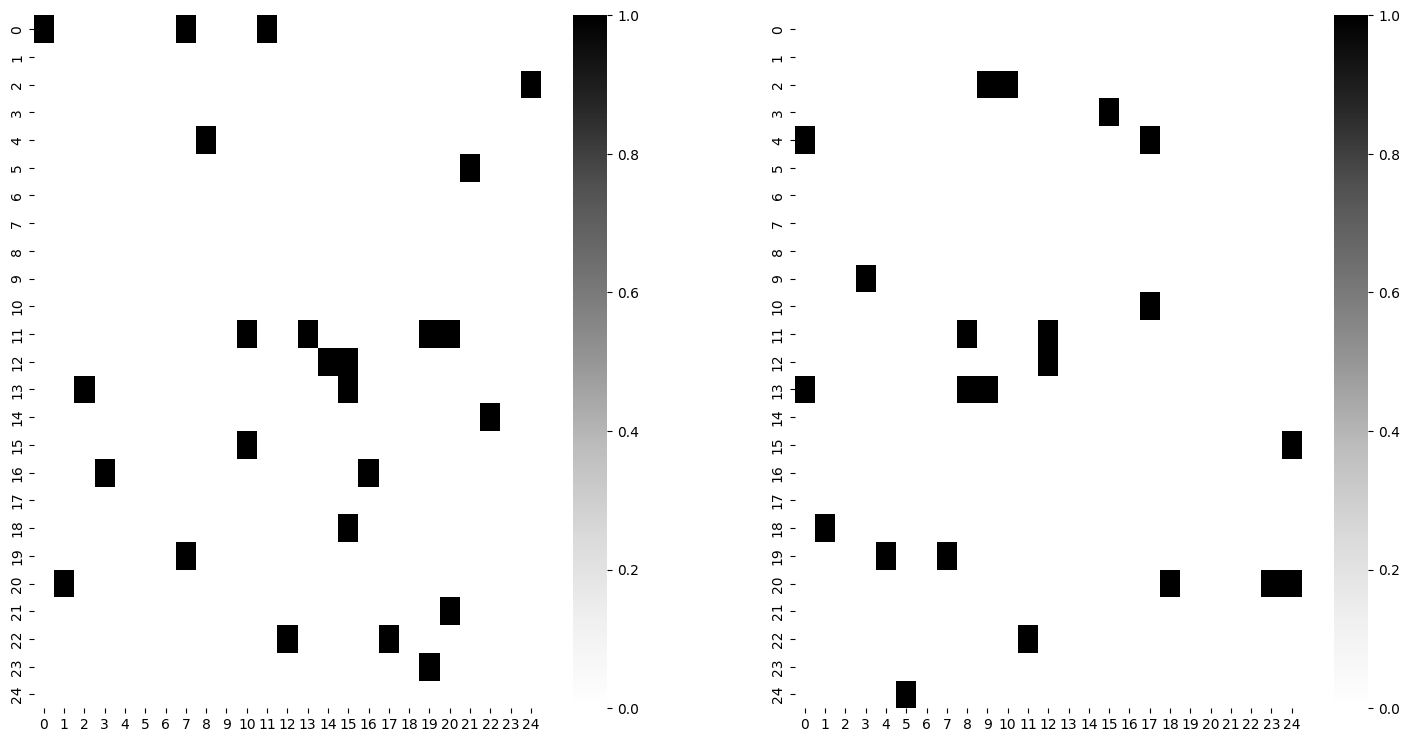

In [43]:
fig, (ax1, ax2) = plt.subplots(
    ncols=2, nrows=1,
    figsize=(18,9)
)
sns.heatmap(task7_matrix[0].reshape(25,25), cmap="Greys", ax=ax1)
sns.heatmap(task7_matrix[1].reshape(25,25), cmap="Greys", ax=ax2)

## Observation: (Failed)
### At corners of the average reshaped matrix, there appears to be some feature that can be used to identify the orientation. As K-Means has failed to come up with any meaningful clustering and other algorithms are too slow, we have tried manual clustering by these features.

In [44]:
cluster_labels = []
for x in task7_matrix:
    x = x.reshape(25,25)
    feature1 = np.sum(x[4:9,6:11])
    feature2 = np.sum(x[6:11,16:21])
    feature3 = np.sum(x[16:21,14:19])
    feature4 = np.sum(x[14:19,4:9])
    #f1 = feature1 == max([feature1, feature2, feature3, feature4])
    #f2 = feature2 == max([feature1, feature2, feature3, feature4])
    #f3 = feature3 == max([feature1, feature2, feature3, feature4])
    #f4 = feature4 == max([feature1, feature2, feature3, feature4])
    #print(feature1, feature2, feature3, feature4)
    #print(f1, f2, f3, f4)
    cluster_labels.append([feature1, feature2, feature3, feature4].index(min([feature1, feature2, feature3, feature4])))

cluster_labels = np.array(cluster_labels)

In [45]:
clusters = []
for i in range(4):
    cluster_indices = np.where(cluster_labels == i)[0]
    cluster_matrix = task7_matrix[cluster_indices]
    clusters.append(cluster_matrix)

# Compute the column averages for each cluster
reshaped_clusters = []
for cluster_matrix in clusters:
    column_averages = np.mean(cluster_matrix, axis=0)
    reshaped_cluster = column_averages.reshape(25, 25)
    reshaped_clusters.append(reshaped_cluster)

In [46]:
clusters[0].shape, clusters[1].shape, clusters[2].shape, clusters[3].shape

((47020, 625), (27269, 625), (16027, 625), (9684, 625))

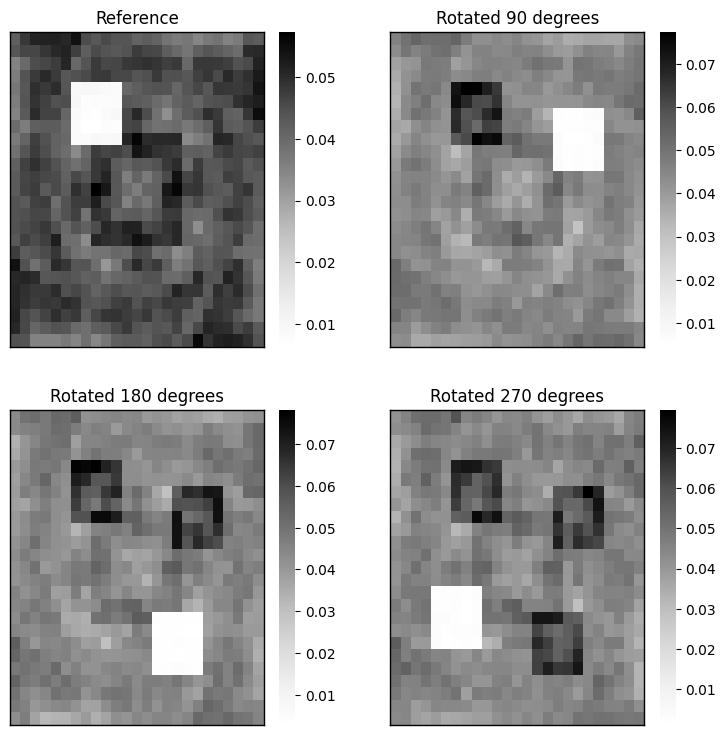

In [47]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
        nrows=2, ncols=2,
        figsize=(9, 9)
    )

sns.heatmap(reshaped_clusters[0], cmap="Greys", ax=ax1)
sns.heatmap(reshaped_clusters[1], cmap="Greys", ax=ax2)
sns.heatmap(reshaped_clusters[2], cmap="Greys", ax=ax3)
sns.heatmap(reshaped_clusters[3], cmap="Greys", ax=ax4)

ax1.set(title="Reference")
for _, spine in ax1.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")
ax1.tick_params(left=False, bottom=False)
ax1.set(xticklabels=[], yticklabels=[])

ax2.set(title="Rotated 90 degrees")
for _, spine in ax2.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")
ax2.tick_params(left=False, bottom=False)
ax2.set(xticklabels=[], yticklabels=[])

ax3.set(title="Rotated 180 degrees")
for _, spine in ax3.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")
ax3.tick_params(left=False, bottom=False)
ax3.set(xticklabels=[], yticklabels=[])

ax4.set(title="Rotated 270 degrees")
for _, spine in ax4.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")
ax4.tick_params(left=False, bottom=False)
ax4.set(xticklabels=[], yticklabels=[])
None

## Pure KMeans (Failed)
### Attempted: Spectral Clustering, DBSCAN, OPTICS, Gaussian Mixture

In [82]:

k = 4

#Apply K-means clustering to group rows into four clusters (orientations)
kmeans = KMeans(n_clusters=k, n_init=200)
kmeans.fit(task7_matrix)

# Get the cluster labels for each row
labels = kmeans.labels_

# Access each cluster separately
clusters = []
for i in range(k):
    cluster_indices = np.where(labels == i)[0]
    cluster_matrix = task7_matrix[cluster_indices]
    clusters.append(cluster_matrix)

# Compute the column averages for each cluster
reshaped_clusters = []
for cluster_matrix in clusters:
    column_averages = np.mean(cluster_matrix, axis=0)
    reshaped_cluster = column_averages.reshape(25, 25)
    reshaped_clusters.append(reshaped_cluster)


In [83]:
clusters[0].shape, clusters[1].shape, clusters[2].shape, clusters[3].shape

((5079, 625), (9442, 625), (9537, 625), (75942, 625))

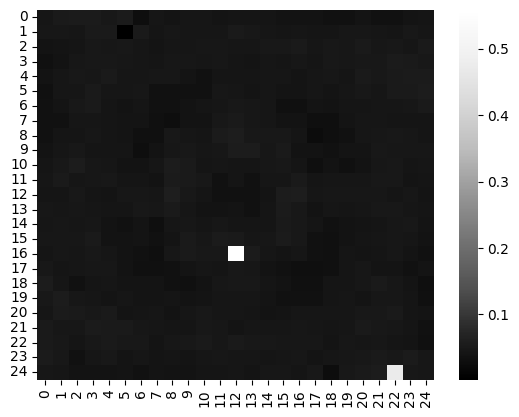

In [84]:
ax = sns.heatmap(reshaped_clusters[1], cmap="Greys_r")

## Dimentionality Reduction

In [183]:

# Number of samples and features
n_samples, n_features = task7_matrix.shape

# Step 1: Dimensionality Reduction with PCA
n_components = 50  # Number of components to retain, adjust as needed
pca = PCA(n_components=n_components)
task7_pca = pca.fit_transform(task7_matrix)

# Step 2: Clustering
n_clusters = 4  # Number of clusters, adjust as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(task7_pca)

# Step 3: Transform centroids back to original feature space
centroids_pca = kmeans.cluster_centers_
centroids_original = pca.inverse_transform(centroids_pca)


In [184]:
image = centroids_original.reshape(4, 25, 25)

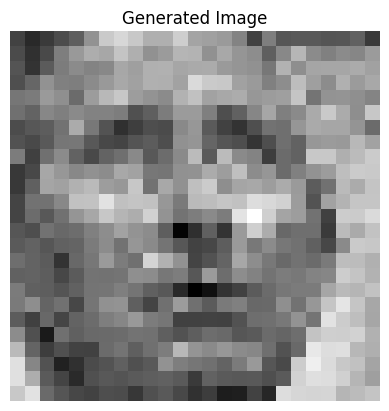

In [186]:
# Display the generated image
plt.imshow(image[0], cmap='Greys_r')  # Displaying the first image in the dataset
plt.title('Generated Image')
plt.axis('off')
plt.show()

In [147]:
cluster_labels

array([1, 2, 2, ..., 3, 3, 0])

In [187]:
clusters = []
for i in range(k):
    cluster_indices = np.where(cluster_labels == i)[0]
    cluster_matrix = task7_matrix[cluster_indices]
    clusters.append(cluster_matrix)

# Compute the column averages for each cluster
sizes = []
reshaped_clusters = []
for cluster_matrix in clusters:
    sizes.append(cluster_matrix.shape[0])
    column_averages = np.mean(cluster_matrix, axis=0)
    reshaped_cluster = column_averages.reshape(25, 25)
    reshaped_clusters.append(reshaped_cluster)

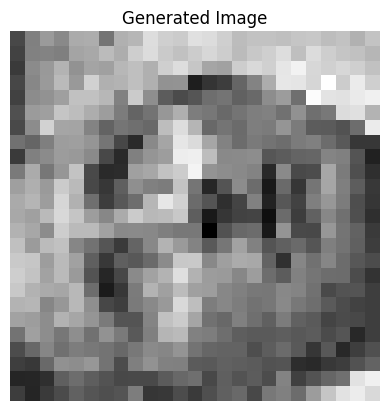

In [197]:
# Display the generated image
plt.imshow(reshaped_clusters[2], cmap='Greys_r')  # Displaying the first image in the dataset
plt.title('Generated Image')
plt.axis('off')
plt.show()

In [198]:
# cluster 0 is aligned
aligned_cluster0 = reshaped_clusters[0]
# cluster 1 is rot90 degrees
aligned_cluster1 = np.rot90(reshaped_clusters[1])
# cluster 2 is rot270 degrees
aligned_cluster2 = np.rot90(np.rot90(np.rot90(reshaped_clusters[2])))
# cluster 3 is rot180 degrees
aligned_cluster3 = np.rot90(np.rot90(reshaped_clusters[3]))
sizes

[25030, 24791, 24799, 25380]

In [199]:
master_image = (sizes[0]*aligned_cluster0 + sizes[1]*aligned_cluster1 + sizes[2]*aligned_cluster2 + sizes[3]* aligned_cluster3)/sum(sizes)


<Axes: title={'center': 'A Somewhat Famous Person'}>

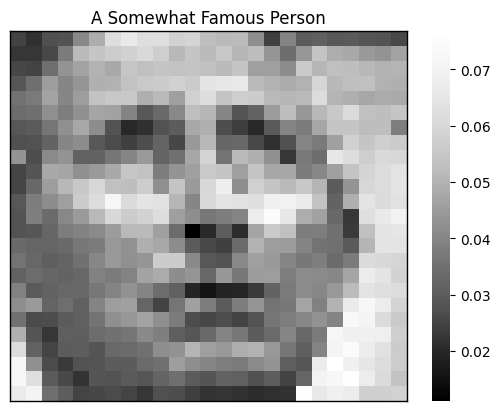

In [200]:

ax = sns.heatmap(master_image, cmap="Greys_r")
#ax.set_axis_off()
ax.set(title="A Somewhat Famous Person")
for _, spine in ax.spines.items():
    spine.set(visible=True, lw=1, edgecolor="black")
ax.tick_params(left=False, bottom=False)
ax.set(xticklabels=[], yticklabels=[])
ax

# Monte Carlo (Ignore)

In [ ]:
m = 0 # number of lambdas and 1s
# N - M is the number of beta lambdas and 0s
N = 16 # length of vectors mu and k
B = 0.5 # beta is variable
L = 1 # lambda is variable

# basically plot level curves with respect to lambda, keeping beta constant

# vector mu
mu = np.zeros(N)
mu[]

# vector k
k = np.zeros(N)
k[:m] = 1
np.random.shuffle(k)
k

(M/N)*math.log(l) + (1-M/N)*math.log(1-B*l)